In [3]:
import numpy as np
a = np.array([5106,2858])
b = np.array([2121,442])

dist = np.linalg.norm(a-b)
print(dist)

3840.218873970597


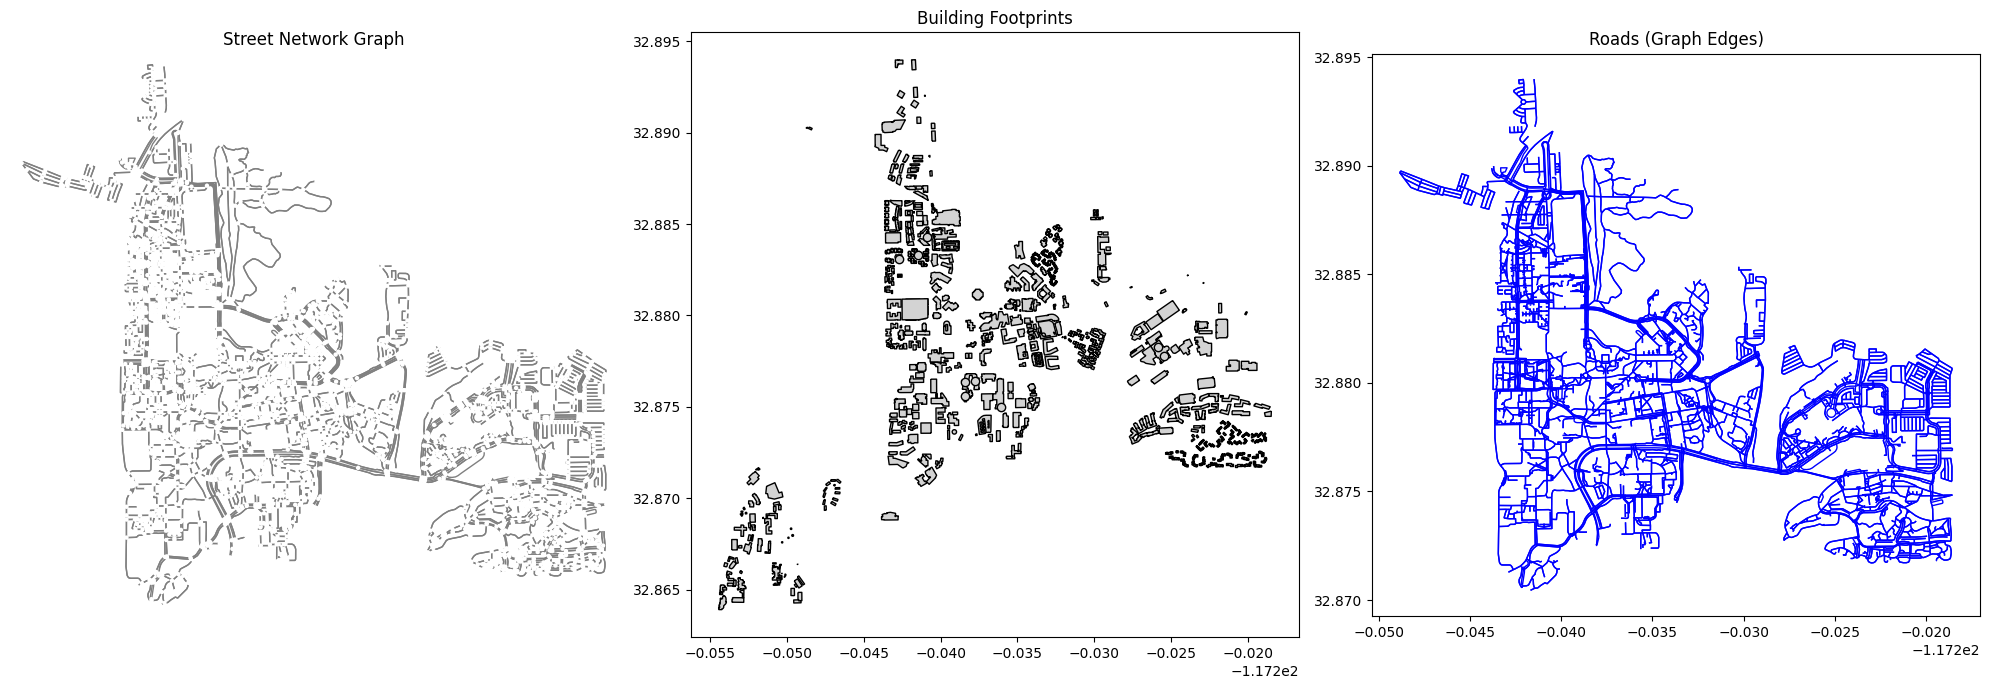

In [4]:
import osmnx as ox
import matplotlib.pyplot as plt

# Configure OSMnx settings
ox.settings.log_console = True
ox.settings.use_cache = True

# Define the area of interest: UCSD Campus.
place_name = "University of California, San Diego, La Jolla, CA, USA"

# Download the full street network graph (directed by default).
G = ox.graph_from_place(place_name, network_type="all")

# Download building footprints as a GeoDataFrame.
buildings = ox.features_from_place(place_name, tags={'building': True})

# Extract nodes and edges as GeoDataFrames from the graph.
nodes, edges = ox.graph_to_gdfs(G)

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# Plot 1: Full street network graph
# Note: ox.plot_graph() accepts an 'ax' parameter.
ox.plot_graph(G, ax=axes[0], node_size=10, edge_color="gray", show=False, close=False)
axes[0].set_title("Street Network Graph")

# Plot 2: Building footprints
buildings.plot(ax=axes[1], color='lightgrey', edgecolor='black')
axes[1].set_title("Building Footprints")

# Plot 3: Roads extracted from the graph edges
edges.plot(ax=axes[2], linewidth=1, edgecolor='blue')
axes[2].set_title("Roads (Graph Edges)")

plt.tight_layout()
plt.show()


IndexError: list index out of range

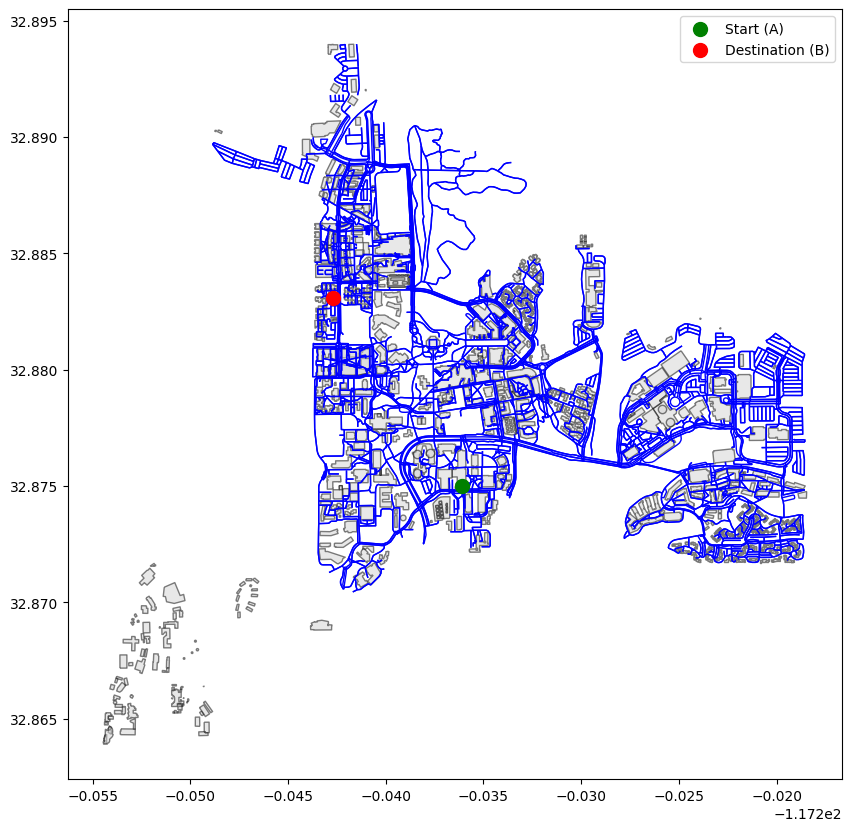

In [2]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# Configure OSMnx settings
ox.settings.log_console = True
ox.settings.use_cache = True

# Define the area of interest (UCSD Campus)
place_name = "University of California, San Diego, La Jolla, CA, USA"

# Download the street network graph (directed by default)
G = ox.graph_from_place(place_name, network_type="all")

# Download building footprints as a GeoDataFrame
buildings = ox.features_from_place(place_name, tags={'building': True})

# Extract nodes and edges GeoDataFrames from the graph (for plotting roads)
nodes, edges = ox.graph_to_gdfs(G)

# ---------------------------------------------------------------------------
# Choose two buildings to serve as start (A) and destination (B)
# For simplicity, select the first two entries with valid geometry.
buildings = buildings[buildings.geometry.notnull()]
if len(buildings) < 2:
    raise Exception("Not enough building data found.")
bldg_A = buildings.iloc[0]
bldg_B = buildings.iloc[1]

# Get the centroids of the selected building footprints
pt_A = bldg_A.geometry.centroid
pt_B = bldg_B.geometry.centroid

# Find the nearest nodes in the graph to these centroids
source = ox.distance.nearest_nodes(G, pt_A.x, pt_A.y)
target = ox.distance.nearest_nodes(G, pt_B.x, pt_B.y)

# Compute the shortest path between these nodes using edge length as weight
route = nx.shortest_path(G, source=source, target=target, weight='length')

# Extract (x, y) coordinates for each node in the route
route_coords = [(G.nodes[n]['x'], G.nodes[n]['y']) for n in route]

# ---------------------------------------------------------------------------
# For a smoother animation, interpolate additional points along the route.
def interpolate_route(coords, num_points=10):
    """
    Linearly interpolate between consecutive coordinates.
    
    Args:
        coords: List of (x, y) tuples.
        num_points: Number of points to interpolate between nodes.
        
    Returns:
        A list of interpolated (x, y) positions.
    """
    interp_coords = []
    for i in range(len(coords) - 1):
        x0, y0 = coords[i]
        x1, y1 = coords[i + 1]
        xs = np.linspace(x0, x1, num=num_points, endpoint=False)
        ys = np.linspace(y0, y1, num=num_points, endpoint=False)
        interp_coords.extend(zip(xs, ys))
    # Include the last coordinate
    interp_coords.append(coords[-1])
    return interp_coords

interp_coords = interpolate_route(route_coords, num_points=20)

# ---------------------------------------------------------------------------
# Prepare the base plot with roads and building footprints
fig, ax = plt.subplots(figsize=(10, 10))

# Plot roads (graph edges)
edges.plot(ax=ax, linewidth=1, edgecolor='blue', zorder=1)

# Plot building footprints with some transparency
buildings.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5, zorder=0)

# Mark the start and end buildings
ax.scatter(pt_A.x, pt_A.y, color='green', s=100, label='Start (A)', zorder=2)
ax.scatter(pt_B.x, pt_B.y, color='red', s=100, label='Destination (B)', zorder=2)
ax.legend()

# Initialize the agent marker (will be updated during the animation)
agent_marker, = ax.plot([], [], 'ro', markersize=8, zorder=3)

# ---------------------------------------------------------------------------
# Define animation update function
def init():
    agent_marker.set_data([], [])
    return agent_marker,

def update(frame):
    x, y = interp_coords[frame]
    agent_marker.set_data(x, y)
    return agent_marker,

# Create the animation using FuncAnimation
frames = len(interp_coords)
anim = FuncAnimation(fig, update, frames=frames, init_func=init, blit=True, interval=100)

# Save the animation as a GIF (requires pillow)
anim.save("agent_route.gif", writer="pillow")

plt.show()


/tmp/ipykernel_2694996/493244967.py:28: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buildings['centroid'] = buildings.centroid


POLYGON ((-117.237814 32.878279, -117.2378489 32.8782776, -117.2378485 32.8782651, -117.2379148 32.8782638, -117.2379162 32.8782761, -117.2379607 32.8782755, -117.2379591 32.8783199, -117.238204 32.8783197, -117.2382686 32.8782744, -117.238325 32.8783224, -117.2382732 32.8783668, -117.2382748 32.878378, -117.238272 32.8783887, -117.2382654 32.878398, -117.2382556 32.8784051, -117.2382436 32.8784092, -117.2382307 32.8784098, -117.2382182 32.878407, -117.2382116 32.8784034, -117.2380181 32.8784042, -117.2380174 32.8784505, -117.2380212 32.8784522, -117.2380287 32.8784592, -117.2380334 32.8784677, -117.2380348 32.878477, -117.2380327 32.8784862, -117.2380274 32.8784945, -117.2380194 32.878501, -117.2380094 32.8785052, -117.2379971 32.8785065, -117.2379849 32.8785044, -117.2379744 32.8784989, -117.2379666 32.8784907, -117.2379626 32.8784809, -117.2379627 32.8784704, -117.2379658 32.8784614, -117.2379145 32.8784615, -117.2378287 32.8784623, -117.2378304 32.878531, -117.2377882 32.8785315, -

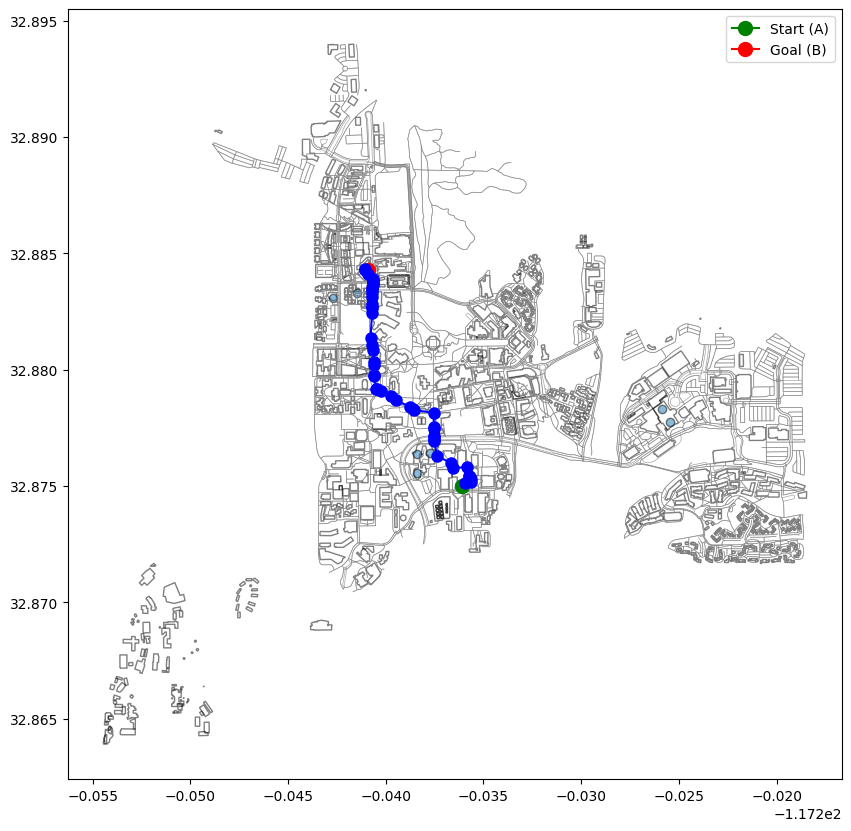

In [11]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Set OSMnx configuration settings
ox.settings.log_console = True
ox.settings.use_cache = True

# Define the area of interest: UCSD Campus.
place_name = "University of California, San Diego, La Jolla, CA, USA"

# Download the street network graph (directed by default)
G = ox.graph_from_place(place_name, network_type="all")

# Download building footprints as a GeoDataFrame using the updated function
buildings = ox.features_from_place(place_name, tags={'building': True})

# Ensure we have valid building geometries
buildings = buildings[buildings.geometry.notnull()]

# Select two buildings as start (A) and destination (B).
# Here, we simply take the first two buildings from the dataset.
if len(buildings) < 2:
    raise Exception("Not enough buildings found in the area.")
    
# Compute centroids for the building geometries
buildings['centroid'] = buildings.centroid
pointA = buildings.iloc[0]['centroid']
pointB = buildings.iloc[2]['centroid']

# Find the nearest nodes on the graph to these centroids
nodeA = ox.distance.nearest_nodes(G, pointA.x, pointA.y)
nodeB = ox.distance.nearest_nodes(G, pointB.x, pointB.y)

# Compute the shortest path between nodeA and nodeB using edge length as weight
path = nx.shortest_path(G, source=nodeA, target=nodeB, weight='length')

# Extract x, y coordinates for each node in the path
path_nodes = [G.nodes[n] for n in path]

for data in buildings.iloc[100]:
    print(data)

# print(f"pt A : {buildings.iloc[200]}")
# print(f"pt B : {buildings.iloc[2]}")
# print(f"pt B : {pointB}")

# print(path_nodes)
x_path = [data['x'] for data in path_nodes]
y_path = [data['y'] for data in path_nodes]

# Convert the graph to GeoDataFrames to plot the road network
nodes_gdf, edges_gdf = ox.graph_to_gdfs(G)

# Create a matplotlib figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the full road network
edges_gdf.plot(ax=ax, linewidth=0.5, edgecolor="gray", alpha=0.7)

# Plot building footprints (optional) for context
buildings.plot(ax=ax, facecolor="none", edgecolor="black", alpha=0.5)

# Plot the selected start and destination building centroids
ax.plot(pointA.x, pointA.y, marker="o", color="green", markersize=10, label="Start (A)")
ax.plot(pointB.x, pointB.y, marker="o", color="red", markersize=10, label="Goal (B)")
ax.legend()

# Create a line object that will represent the moving agent.
# Initially, it has no data.
agent_line, = ax.plot([], [], marker="o", color="blue", markersize=8, label="Agent")

# Define initialization function for the animation
def init():
    agent_line.set_data([], [])
    return (agent_line,)

# Animation update function: update agent_line with the path segment up to frame i
def animate(i):
    agent_line.set_data(x_path[:i+1], y_path[:i+1])
    return (agent_line,)

# Create the animation: one frame per node in the path, with an interval between frames
anim = animation.FuncAnimation(
    fig, animate, init_func=init,
    frames=len(x_path), interval=500, blit=True
)

# Save the animation as a GIF (requires pillow)
anim.save("ucsd_path.gif", writer="pillow")

plt.show()
